In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
%matplotlib inline

In [2]:
# Read in the gdp dataset
gdp_df = pd.read_csv('../data/gdp_per_capita.csv')

In [3]:
gdp_df = gdp_df[:-2]

In [4]:
# Look at first 10 rows
gdp_df.head(10)

,Country or Area,Year,Value,Value Footnotes
0,Afghanistan,2018,1734.723214,NaN
1,Afghanistan,2017,1758.465636,NaN
2,Afghanistan,2016,1757.023490,NaN
3,Afghanistan,2015,1766.593077,NaN
4,Afghanistan,2014,1795.735834,NaN
5,Afghanistan,2013,1807.762344,NaN
6,Afghanistan,2012,1772.764974,NaN
7,Afghanistan,2011,1626.764793,NaN
8,Afghanistan,2010,1671.581238,NaN
9,Afghanistan,2009,1502.354073,NaN


In [5]:
# Look at last 5 rows
gdp_df.tail(5)

,Country or Area,Year,Value,Value Footnotes
6724,Zimbabwe,1994,2768.309953,NaN
6725,Zimbabwe,1993,2572.870395,NaN
6726,Zimbabwe,1992,2591.007534,NaN
6727,Zimbabwe,1991,2906.272849,NaN
6728,Zimbabwe,1990,2819.549467,NaN


In [6]:
gdp_df.describe()

,Value,Value Footnotes
count,6729.000000,1.0
mean,15468.017091,2.0
std,17995.866104,NaN
min,438.643111,2.0
25%,3170.407545,2.0
50%,8959.240204,2.0
75%,20940.081023,2.0
max,134959.989044,2.0


In [7]:
gdp_df = gdp_df.drop(columns = 'Value Footnotes')

In [8]:
gdp_df.columns = ['Country', 'Year', 'GDP_Per_Capita']

In [9]:
gdp_df.head(10)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
5,Afghanistan,2013,1807.762344
6,Afghanistan,2012,1772.764974
7,Afghanistan,2011,1626.764793
8,Afghanistan,2010,1671.581238
9,Afghanistan,2009,1502.354073


In [10]:
gdp_df.head(-5)

,Country,Year,GDP_Per_Capita
0,Afghanistan,2018,1734.723214
1,Afghanistan,2017,1758.465636
2,Afghanistan,2016,1757.023490
3,Afghanistan,2015,1766.593077
4,Afghanistan,2014,1795.735834
...,...,...,...
6719,Zimbabwe,1999,3054.064189
6720,Zimbabwe,1998,3099.076182
6721,Zimbabwe,1997,3036.422224
6722,Zimbabwe,1996,2985.856605


In [11]:
gdp_df.shape

(6729, 3)

In [12]:
print(gdp_df.dtypes)


Country            object
Year               object
GDP_Per_Capita    float64
dtype: object


In [13]:
gdp_df.Year = pd.to_numeric(gdp_df.Year)

In [14]:
print(gdp_df.dtypes)

Country            object
Year                int64
GDP_Per_Capita    float64
dtype: object


In [15]:
# 8.  Notice that the count increases until 2011, then declines. Sharp decline from 2017 - 2018  
gdp_df.Year.value_counts().sort_index()

1990    210
1991    211
1992    213
1993    215
1994    218
1995    224
1996    224
1997    226
1998    227
1999    228
2000    236
2001    237
2002    238
2003    238
2004    238
2005    238
2006    238
2007    239
2008    240
2009    241
2010    241
2011    243
2012    241
2013    241
2014    240
2015    240
2016    239
2017    239
2018    226
Name: Year, dtype: int64

In [16]:
#9
gdp_df.Country.value_counts()

Dominican Republic           29
Late-demographic dividend    29
Saudi Arabia                 29
Lesotho                      29
Portugal                     29
                             ..
Nauru                        12
Sint Maarten (Dutch part)     9
Turks and Caicos Islands      8
South Sudan                   8
Djibouti                      1
Name: Country, Length: 243, dtype: int64

In [17]:
gdp_df.Country.describe()

count                   6729
unique                   243
top       Dominican Republic
freq                      29
Name: Country, dtype: object

In [18]:
gdp_df.Country.index

RangeIndex(start=0, stop=6729, step=1)

In [19]:
#10.  Create dataset for 2014 only called gdp_2014
gdp_2014 = gdp_df[gdp_df['Year'] == 2014]

In [20]:
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


In [21]:
gdp_2014.describe()

,Year,GDP_Per_Capita
count,240.0,240.000000
mean,2014.0,18034.303556
std,0.0,19320.930599
min,2014.0,672.681648
25%,2014.0,4301.187365
50%,2014.0,11868.067810
75%,2014.0,24388.408410
max,2014.0,130439.106674


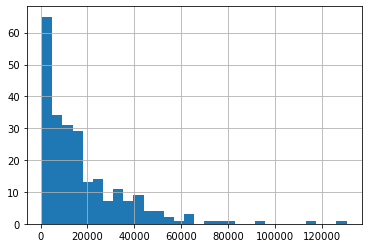

In [22]:
gdp_2014['GDP_Per_Capita'].hist(bins=30)

In [23]:
# Observations = right skewed, uni-modal.  In most cases, mean would be higher than the median

In [24]:
#13 Top 5 and bottom 5 countries by 2014 GDP
gdp_2014.head()

,Country,Year,GDP_Per_Capita
4,Afghanistan,2014,1795.735834
21,Albania,2014,10700.993216
50,Algeria,2014,13557.769757
79,Angola,2014,6813.052106
108,Antigua and Barbuda,2014,20440.540555


In [25]:
gdp_2014.tail()

,Country,Year,GDP_Per_Capita
6592,West Bank and Gaza,2014,4445.307470
6617,World,2014,14514.392218
6646,Yemen,2014,3828.484887
6675,Zambia,2014,3684.685507
6704,Zimbabwe,2014,2506.490220


In [26]:
gdp_2014.sort_values(by=['GDP_Per_Capita'])

,Country,Year,GDP_Per_Capita
1014,Central African Republic,2014,672.681648
794,Burundi,2014,768.469837
1375,Dem. Rep. Congo,2014,784.872656
4414,Niger,2014,900.136918
3697,Malawi,2014,1142.530804
...,...,...,...
707,Brunei,2014,76448.593329
5316,Singapore,2014,81965.361071
3610,Luxembourg,2014,92349.186429
5003,Qatar,2014,116693.507701


In [27]:
gdp_1990_2017 =gdp_df[gdp_df['Year'].isin([1990,2017])]
print(gdp_1990_2017.head())

        Country  Year  GDP_Per_Capita
1   Afghanistan  2017     1758.465636
18      Albania  2017    11796.719185
45      Albania  1990     4458.247115
47      Algeria  2017    13822.389087
74      Algeria  1990    10300.015042


In [28]:
# 14 pivot to 1990 and 2017
gdp_pivoted = gdp_1990_2017.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year')

Veronica's code
gdp_pivoted = gdp_pivoted.pivot_table(values = 'GDP_Per_Capita', index = 'Country', columns = 'Year').dropna()

In [29]:
gdp_pivoted

Year,1990,2017
Country,,
Afghanistan,NaN,1758.465636
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
...,...,...
West Bank and Gaza,NaN,4651.723645
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [30]:
gdp_pivoted = gdp_pivoted.dropna()

In [31]:
gdp_pivoted

Year,1990,2017
Country,,
Albania,4458.247115,11796.719185
Algeria,10300.015042,13822.389087
Angola,4761.229638,6044.972035
Antigua and Barbuda,17454.549799,22400.379562
Arab World,10491.507721,15542.746104
...,...,...
Vietnam,1457.594613,6233.485045
World,8966.014072,15527.280228
Yemen,3425.707169,2404.422370


In [32]:
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]


<ipython-input-32-59379f0cdf4b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]


In [33]:
gdp_pivoted.head()

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972


In [34]:
#15
gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]

<ipython-input-34-d98235c583e0>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_pivoted['Percent_Change'] = 100 * (gdp_pivoted[2017] - gdp_pivoted[1990]) / gdp_pivoted[1990]


In [35]:
gdp_pivoted

Year,1990,2017,Percent_Change
Country,,,
Albania,4458.247115,11796.719185,164.604426
Algeria,10300.015042,13822.389087,34.197756
Angola,4761.229638,6044.972035,26.962413
Antigua and Barbuda,17454.549799,22400.379562,28.335476
Arab World,10491.507721,15542.746104,48.145972
...,...,...,...
Vietnam,1457.594613,6233.485045,327.655604
World,8966.014072,15527.280228,73.179298
Yemen,3425.707169,2404.422370,-29.812379


In [36]:
gdp_pivoted.sort_values("Percent_Change")

Year,1990,2017,Percent_Change
Country,,,
Dem. Rep. Congo,1386.933242,807.752905,-41.759785
United Arab Emirates,112349.597967,66477.818719,-40.829500
Burundi,1027.396660,670.777072,-34.710993
Yemen,3425.707169,2404.422370,-29.812379
Ukraine,10463.959955,7906.540301,-24.440266
...,...,...,...
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
Myanmar,730.228038,5610.324700,668.297629


In [37]:
gdp_negative = gdp_pivoted[gdp_pivoted["Percent_Change"] < 0]

In [38]:
gdp_negative

Year,1990,2017,Percent_Change
Country,,,
Aruba,37140.024657,35861.828118,-3.441561
Brunei,84693.336970,72523.729446,-14.369026
Burundi,1027.396660,670.777072,-34.710993
Central African Republic,982.659793,746.434942,-24.039332
Comoros,2580.500555,2555.966364,-0.950753
Congo,5323.022707,5103.142821,-4.130734
Dem. Rep. Congo,1386.933242,807.752905,-41.759785
Gabon,19556.665840,16144.935297,-17.445359
Guinea-Bissau,1633.612989,1576.748994,-3.480873


In [39]:
gdp_negative_sorted = gdp_negative.sort_values(by=['Percent_Change'])

In [40]:
gdp_negative_sorted.count()

Year
1990              20
2017              20
Percent_Change    20
dtype: int64

In [41]:
gdp_pivoted_positive = gdp_pivoted[gdp_pivoted["Percent_Change"] > 500]

In [42]:
gdp_pivoted_positive_sorted = gdp_pivoted_positive.sort_values(by=['Percent_Change'])
gdp_pivoted_positive_sorted

Year,1990,2017,Percent_Change
Country,,,
East Asia & Pacific (IDA & IBRD),2246.661835,13686.880719,509.209651
East Asia & Pacific (excluding high income),2222.407152,13544.178535,509.437318
Myanmar,730.228038,5610.324700,668.297629
China,1521.963868,15253.993071,902.257241
Equatorial Guinea,1017.764136,22298.942144,2090.973464


In [43]:
# 17  Equatorial Guinea experienced the highest increase.  Drop a line plot showing the Y-by-Y GDP_per_capita
gdp_df_eq_guin = gdp_df[gdp_df['Country']=='Equatorial Guinea']

In [44]:
gdp_df_eq_guin

,Country,Year,GDP_Per_Capita
1691,Equatorial Guinea,2018,20181.132964
1692,Equatorial Guinea,2017,22298.942144
1693,Equatorial Guinea,2016,24296.603580
1694,Equatorial Guinea,2015,27708.638182
1695,Equatorial Guinea,2014,31743.410748
1696,Equatorial Guinea,2013,32959.108100
1697,Equatorial Guinea,2012,35887.816302
1698,Equatorial Guinea,2011,34622.116266
1699,Equatorial Guinea,2010,33990.146771
1700,Equatorial Guinea,2009,39060.913034


In [45]:
gdp_df_eq_guin.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29 entries, 1691 to 1719
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Country         29 non-null     object 
 1   Year            29 non-null     int64  
 2   GDP_Per_Capita  29 non-null     float64
dtypes: float64(1), int64(1), object(1)
memory usage: 928.0+ bytes


Text(0.5, 1.0, 'Equatorial Guinea Historical GDP Per Capital')

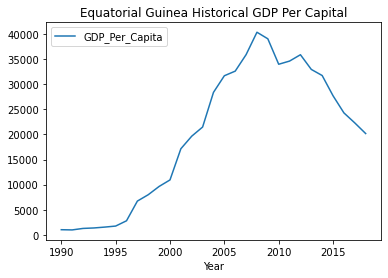

In [46]:
gdp_df_eq_guin.plot(kind = 'line', x = 'Year', y = 'GDP_Per_Capita')
plt.title('Equatorial Guinea Historical GDP Per Capital')

In [47]:
#17 cont.. China had the second highest percent increase in GDP.  Drop a line plot showing the Y-O-Y results for China.  
gdp_df_china = gdp_df[gdp_df['Country']=='China']

In [48]:
gdp_df_china

,Country,Year,GDP_Per_Capita
1126,China,2018,16181.777716
1127,China,2017,15253.993071
1128,China,2016,14368.630801
1129,China,2015,13534.846237
1130,China,2014,12725.089099
1131,China,2013,11919.607104
1132,China,2012,11115.110675
1133,China,2011,10355.495713
1134,China,2010,9498.079744
1135,China,2009,8626.532479


Text(0.5, 1.0, 'China Historical GDP Per Capital')

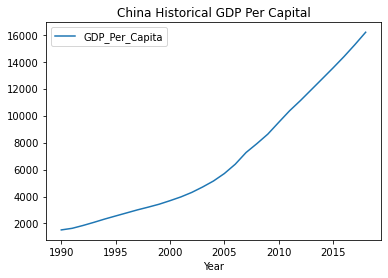

In [49]:
gdp_df_china.plot(kind = 'line', x = 'Year', y = 'GDP_Per_Capita')
plt.title('China Historical GDP Per Capital')

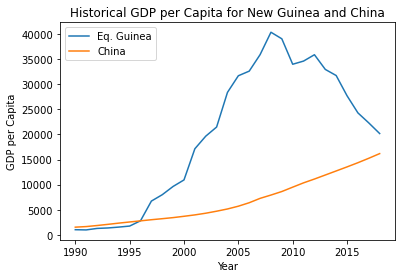

In [50]:
#17 Bonus:  plot both New Guinea Equatorial and China on the same graph
plt.plot(gdp_df_eq_guin['Year'],gdp_df_eq_guin['GDP_Per_Capita'], label = 'Eq. Guinea')
plt.plot(gdp_df_china['Year'],gdp_df_china['GDP_Per_Capita'], label = 'China')
plt.xlabel('Year')
plt.ylabel('GDP per Capita')
plt.title('Historical GDP per Capita for New Guinea and China')
plt.legend()

# 18 

In [51]:
#18 - read in new dataframe, Continents 
continents = pd.read_csv('../data/continents.csv')
continents.head()

,Continent,Country
0,Asia,Afghanistan
1,Europe,Albania
2,Africa,Algeria
3,Europe,Andorra
4,Africa,Angola


In [52]:
gdp_df = gdp_df.merge(continents, on='Country')
gdp_df.head()

,Country,Year,GDP_Per_Capita,Continent
0,Afghanistan,2018,1734.723214,Asia
1,Afghanistan,2017,1758.465636,Asia
2,Afghanistan,2016,1757.023490,Asia
3,Afghanistan,2015,1766.593077,Asia
4,Afghanistan,2014,1795.735834,Asia


In [53]:
gdp_df.groupby('Continent').agg({'Country':'nunique'})

,Country
Continent,
Africa,51
Asia,44
Europe,45
North America,26
Oceania,14
South America,12


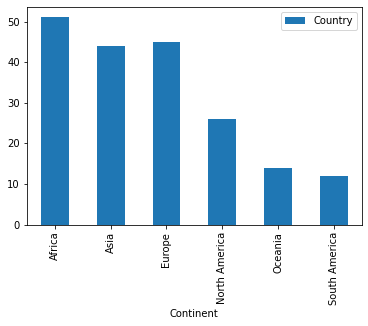

In [54]:
gdp_df.groupby('Continent').agg({'Country':'nunique'}).plot(kind='bar')

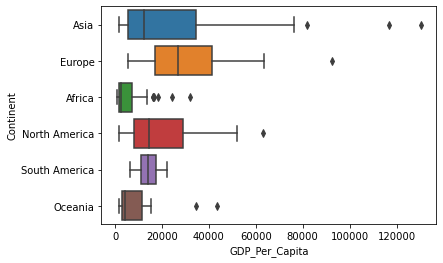

In [55]:
# 21, Create a seaborn boxplot showing GDP per capita in 2014 split out by continent. What do you notice?
sns.boxplot(data = gdp_df[gdp_df['Year']==2014], x = 'GDP_Per_Capita', y = 'Continent' )

In [56]:
internet_df = pd.read_csv('../data/internet_use.csv', error_bad_lines = False, skipfooter=181, engine='python')
internet_df.tail()

Skipping line 4675: ',' expected after '"'. Error could possibly be due to parsing errors in the skipped footer rows (the skipfooter keyword is only applied after Python's csv library has parsed all rows).


,Country or Area,Year,Value,Value Footnotes
4490,Zimbabwe,1997,0.033080,NaN
4491,Zimbabwe,1996,0.016790,NaN
4492,Zimbabwe,1995,0.007684,NaN
4493,Zimbabwe,1994,0.001739,NaN
4494,Zimbabwe,1990,0.000000,NaN


In [57]:
#22 Drop 'Value Footnotes' column
internet_df=internet_df.drop(columns = 'Value Footnotes')

In [58]:
#23 Change Column Names 
internet_df.columns = ['Country', 'Year', 'Internet_Users_Pct']

In [59]:
internet_df

,Country,Year,Internet_Users_Pct
0,Afghanistan,2014,6.390000
1,Afghanistan,2013,5.900000
2,Afghanistan,2012,5.454545
3,Afghanistan,2011,5.000000
4,Afghanistan,2010,4.000000
...,...,...,...
4490,Zimbabwe,1997,0.033080
4491,Zimbabwe,1996,0.016790
4492,Zimbabwe,1995,0.007684
4493,Zimbabwe,1994,0.001739


In [60]:
internet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4495 entries, 0 to 4494
Data columns (total 3 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             4495 non-null   object 
 1   Year                4495 non-null   int64  
 2   Internet_Users_Pct  4495 non-null   float64
dtypes: float64(1), int64(1), object(1)
memory usage: 105.5+ KB


25. What is the first year that has a nonzero internet users percentage reported? What is the general trend in internet users percentage over the years. Pick a visualization that you think illustrates this trend well.
Answer: 1990 is first year where internet usage is higher than 0

In [61]:
internet_df[internet_df['Internet_Users_Pct'] > 0].sort_values(by = 'Year')

,Country,Year,Internet_Users_Pct
2048,Italy,1990,0.017545
1107,Denmark,1990,0.097277
375,Belgium,1990,0.001007
1388,Finland,1990,0.401088
4301,United States,1990,0.784729
...,...,...,...
2175,Kiribati,2014,12.250000
848,Colombia,2014,52.570000
1299,Ethiopia,2014,2.900000
623,Burundi,2014,1.380000


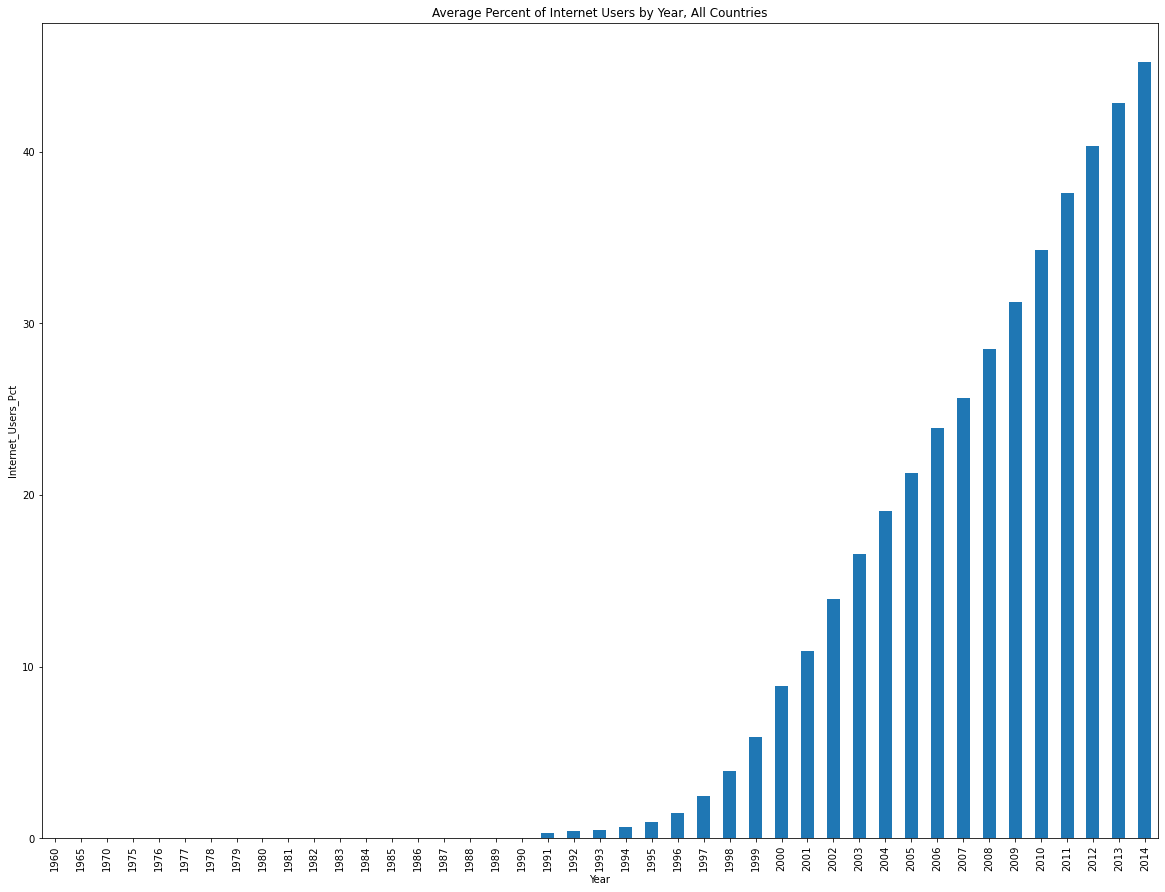

In [62]:
internet_df.groupby('Year')['Internet_Users_Pct'].mean().plot(kind = 'bar', figsize=(20,15))
plt.title('Average Percent of Internet Users by Year, All Countries')
plt.ylabel('Internet_Users_Pct');

# #26

In [63]:
#merge gdp_df & internet_df
gdp_and_internet_use = gdp_df.merge(internet_df, on=['Country', 'Year'])

In [64]:
gdp_and_internet_use

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000
...,...,...,...,...,...
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739


# 26 Bonus


# 27 

In [65]:
gdp_and_internet_use.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.390000
1,Afghanistan,2013,1807.762344,Asia,5.900000
2,Afghanistan,2012,1772.764974,Asia,5.454545
3,Afghanistan,2011,1626.764793,Asia,5.000000
4,Afghanistan,2010,1671.581238,Asia,4.000000


In [66]:
gdp_and_internet_use.tail()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3514,Zimbabwe,1997,3036.422224,Africa,0.033080
3515,Zimbabwe,1996,2985.856605,Africa,0.016790
3516,Zimbabwe,1995,2736.486436,Africa,0.007684
3517,Zimbabwe,1994,2768.309953,Africa,0.001739
3518,Zimbabwe,1990,2819.549467,Africa,0.000000


28.  Create a new DataFrame, named gdp_and_internet_use_2014 by extracting data for the year 2014 from gdp_and_internet_use. What is the
mean internet users percentage in 2014? How many countries have at least
90% internet users in 2014?

In [67]:
gdp_and_internet_use_2014 = gdp_and_internet_use[gdp_and_internet_use['Year'] == 2014]

In [68]:
gdp_and_internet_use_2014

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
0,Afghanistan,2014,1795.735834,Asia,6.39
13,Albania,2014,10700.993216,Europe,60.10
34,Algeria,2014,13557.769757,Africa,18.09
56,Angola,2014,6813.052106,Africa,21.26
76,Antigua and Barbuda,2014,20440.540555,North America,64.00
...,...,...,...,...,...
3411,Vanuatu,2014,2837.122659,Oceania,18.80
3431,Venezuela,2014,17131.386907,South America,57.00
3455,Yemen,2014,3828.484887,Asia,22.55
3475,Zambia,2014,3684.685507,Africa,17.34


In [69]:
#2014 mean of internet users
gdp_and_internet_use_2014['Internet_Users_Pct'].describe()

count    164.000000
mean      44.673536
std       29.369046
min        1.140000
25%       17.452500
50%       43.775000
75%       70.295000
max       98.160000
Name: Internet_Users_Pct, dtype: float64

In [70]:
gdp_and_internet_use_2014['Internet_Users_Pct'].agg(['mean'])


mean    44.673536
Name: Internet_Users_Pct, dtype: float64

In [71]:
# number of countries that have at least 90% users
gdp_and_internet_use_2014[gdp_and_internet_use_2014['Internet_Users_Pct']>90].count()

Country               12
Year                  12
GDP_Per_Capita        12
Continent             12
Internet_Users_Pct    12
dtype: int64

29. Find the countries that had the top 3 largest GDP per capita figures for
2014. Create a seaborn FacetGrid showing the change in internet user
percentage over time for three countries. Each individual figure in the
facet grid will represent a single country. What trends do you notice?

In [72]:
# Qatar, Luxembourg, Singapore are top 3 GDP
gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending=False).head(3)

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
2556,Qatar,2014,116693.507701,Asia,91.49
1812,Luxembourg,2014,92349.186429,Europe,94.67
2765,Singapore,2014,81965.361071,Asia,82.00


In [73]:
gdp_and_internet_use_2014_top3 = gdp_and_internet_use_2014.sort_values('GDP_Per_Capita', ascending=False)

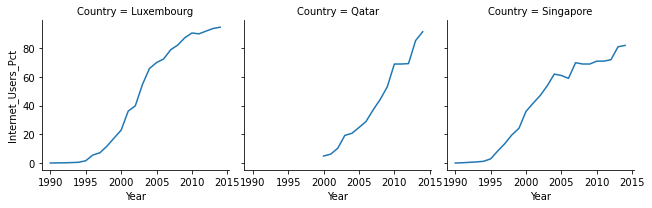

In [74]:
plt.figsize = (12,8)
gdp_and_internet_use_2014_top3 = gdp_and_internet_use[gdp_and_internet_use['Country'].isin(['Qatar','Luxembourg','Singapore'])]
g = sns.FacetGrid(gdp_and_internet_use_2014_top3, col = "Country" )
g.map_dataframe(sns.lineplot, "Year", 'Internet_Users_Pct')
plt.show()

Text(0.5, 1.0, 'GDP vs Internet Use')

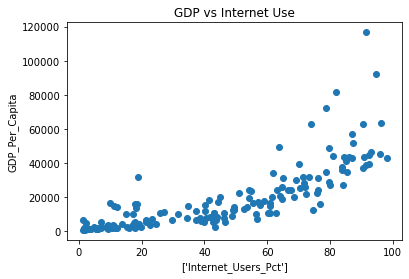

In [75]:
#30 Create a scatter plot of Internet Use vs GDP per Capita for the year 2014. What do you notice?
plt.scatter(x = gdp_and_internet_use_2014['Internet_Users_Pct'], y = gdp_and_internet_use_2014['GDP_Per_Capita'])
plt.xlabel(['Internet_Users_Pct'])
plt.ylabel('GDP_Per_Capita')
plt.title('GDP vs Internet Use')


In [76]:
#30 - positive correlation. Correlation coefficience below indicates strong.   
np.corrcoef(gdp_and_internet_use_2014.Internet_Users_Pct, gdp_and_internet_use_2014.GDP_Per_Capita)

array([[1.        , 0.78798857],
       [0.78798857, 1.        ]])

In [77]:
gdp_and_internet_use_2014.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 164 entries, 0 to 3497
Data columns (total 5 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Country             164 non-null    object 
 1   Year                164 non-null    int64  
 2   GDP_Per_Capita      164 non-null    float64
 3   Continent           164 non-null    object 
 4   Internet_Users_Pct  164 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 7.7+ KB


In [78]:
gdp_and_internet_use_2014['GDP_Per_Capita_Log']=np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])

<ipython-input-78-d833130e72b6>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  gdp_and_internet_use_2014['GDP_Per_Capita_Log']=np.log(gdp_and_internet_use_2014['GDP_Per_Capita'])


In [79]:
gdp_and_internet_use_2014.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct,GDP_Per_Capita_Log
0,Afghanistan,2014,1795.735834,Asia,6.39,7.493170
13,Albania,2014,10700.993216,Europe,60.10,9.278092
34,Algeria,2014,13557.769757,Africa,18.09,9.514715
56,Angola,2014,6813.052106,Africa,21.26,8.826595
76,Antigua and Barbuda,2014,20440.540555,North America,64.00,9.925275


33. Filter the original dataset down to just the United States for all available years. Calculate correlation between internet use and gdp per capita. Is this meaningful or useful?

In [90]:
gdp_and_internet_use_us = gdp_and_internet_use[gdp_and_internet_use['Country']=='United States']
gdp_and_internet_use_us.head()

,Country,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
3343,United States,2014,52080.792568,North America,87.360000
3344,United States,2013,51208.892428,North America,84.200000
3345,United States,2012,50632.443448,North America,79.300000
3346,United States,2011,49883.113984,North America,69.729461
3347,United States,2010,49479.248679,North America,71.690000


# 33

In [91]:
np.corrcoef(gdp_and_internet_use_us.Internet_Users_Pct, gdp_and_internet_use_us.GDP_Per_Capita)

array([[1.        , 0.99161802],
       [0.99161802, 1.        ]])

#Extremely high correlation between GDP_Per_Capita and the percentage of Internet Users.  Whether meaningful remains to be seen

In [100]:
#26 Bonus
pd.options.display.max_rows = 999
gdp_and_internet_use.groupby('Country').count()

,Year,GDP_Per_Capita,Continent,Internet_Users_Pct
Country,,,,
Afghanistan,13,13,13,13
Albania,21,21,21,21
Algeria,22,22,22,22
Angola,20,20,20,20
Antigua and Barbuda,21,21,21,21
Argentina,24,24,24,24
Armenia,22,22,22,22
Aruba,18,18,18,18
Australia,22,22,22,22
